In [1]:
"""
COCO Dataset Explorer
This script demonstrates how to load and explore the COCO dataset.
"""

'\nCOCO Dataset Explorer\nThis script demonstrates how to load and explore the COCO dataset.\n'

In [2]:
import os
import random

In [3]:
import dotenv
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
# Load environment variables
dotenv.load_dotenv()

True

In [5]:
# Get COCO dataset path from environment variables
COCO_ROOT = os.getenv("COCO_ROOT")
if not COCO_ROOT:
    raise ValueError("COCO_ROOT environment variable not set")

In [6]:
print(f"COCO dataset path: {COCO_ROOT}")

COCO dataset path: /Users/wmu/vibe/hub/data/COCO


In [7]:
# Class names from COCO dataset
class_names = {
    0: "person",
    1: "bicycle",
    2: "car",
    3: "motorcycle",
    4: "airplane",
    5: "bus",
    6: "train",
    7: "truck",
    8: "boat",
    9: "traffic light",
    10: "fire hydrant",
    11: "stop sign",
    12: "parking meter",
    13: "bench",
    14: "bird",
    15: "cat",
    16: "dog",
    17: "horse",
    18: "sheep",
    19: "cow",
    20: "elephant",
    21: "bear",
    22: "zebra",
    23: "giraffe",
    24: "backpack",
    25: "umbrella",
    26: "handbag",
    27: "tie",
    28: "suitcase",
    29: "frisbee",
    30: "skis",
    31: "snowboard",
    32: "sports ball",
    33: "kite",
    34: "baseball bat",
    35: "baseball glove",
    36: "skateboard",
    37: "surfboard",
    38: "tennis racket",
    39: "bottle",
    40: "wine glass",
    41: "cup",
    42: "fork",
    43: "knife",
    44: "spoon",
    45: "bowl",
    46: "banana",
    47: "apple",
    48: "sandwich",
    49: "orange",
    50: "broccoli",
    51: "carrot",
    52: "hot dog",
    53: "pizza",
    54: "donut",
    55: "cake",
    56: "chair",
    57: "couch",
    58: "potted plant",
    59: "bed",
    60: "dining table",
    61: "toilet",
    62: "tv",
    63: "laptop",
    64: "mouse",
    65: "remote",
    66: "keyboard",
    67: "cell phone",
    68: "microwave",
    69: "oven",
    70: "toaster",
    71: "sink",
    72: "refrigerator",
    73: "book",
    74: "clock",
    75: "vase",
    76: "scissors",
    77: "teddy bear",
    78: "hair drier",
    79: "toothbrush",
}

In [8]:
# Paths
train_dir = os.path.join(COCO_ROOT, "images", "train2017")
train_labels_dir = os.path.join(COCO_ROOT, "labels", "train2017")
val_dir = os.path.join(COCO_ROOT, "images", "val2017")
val_labels_dir = os.path.join(COCO_ROOT, "labels", "val2017")

In [9]:
# Function to get dataset statistics
def get_dataset_stats():
    """Get basic statistics about the COCO dataset"""
    train_images = [f for f in os.listdir(train_dir) if f.endswith(".jpg")]
    train_labels = [f for f in os.listdir(train_labels_dir) if f.endswith(".txt")]
    val_images = [f for f in os.listdir(val_dir) if f.endswith(".jpg")]
    val_labels = [f for f in os.listdir(val_labels_dir) if f.endswith(".txt")]

    print(f"Number of training images: {len(train_images)}")
    print(f"Number of training label files: {len(train_labels)}")
    print(f"Number of validation images: {len(val_images)}")
    print(f"Number of validation label files: {len(val_labels)}")

    return {
        "train_images": train_images,
        "train_labels": train_labels,
        "val_images": val_images,
        "val_labels": val_labels,
    }

In [10]:
# Function to get class distribution
def get_class_distribution(labels_dir, num_samples=1000):
    """Get distribution of classes in the dataset using a sample of label files"""
    label_files = [f for f in os.listdir(labels_dir) if f.endswith(".txt")]

    if len(label_files) > num_samples:
        label_files = random.sample(label_files, num_samples)

    class_counts = dict.fromkeys(class_names.keys(), 0)

    for label_file in label_files:
        with open(os.path.join(labels_dir, label_file), "r") as f:
            for line in f:
                values = line.strip().split(" ")
                class_id = int(values[0])
                class_counts[class_id] += 1

    # Convert to a list of (class_name, count) sorted by count
    class_dist = [(class_names[class_id], count) for class_id, count in class_counts.items()]
    class_dist.sort(key=lambda x: x[1], reverse=True)

    return class_dist

In [11]:
# Function to visualize an image with its annotations
def visualize_sample(image_path, label_path, output_path=None):
    """Visualize an image with its bounding box annotations"""
    if not os.path.exists(image_path):
        print(f"Image file not found: {image_path}")
        return

    if not os.path.exists(label_path):
        print(f"Label file not found: {label_path}")
        return

    # Read image
    img = Image.open(image_path)
    width, height = img.size

    # Read annotations
    boxes = []
    classes = []
    with open(label_path, "r") as f:
        for line in f:
            values = line.strip().split(" ")
            class_id = int(values[0])
            x_center = float(values[1]) * width
            y_center = float(values[2]) * height
            w = float(values[3]) * width
            h = float(values[4]) * height

            # Convert to (x1, y1, x2, y2) format for easier visualization
            x1 = x_center - w / 2
            y1 = y_center - h / 2
            x2 = x_center + w / 2
            y2 = y_center + h / 2

            boxes.append([x1, y1, x2, y2])
            classes.append(class_id)

    # Set up the plot
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(np.array(img))

    # Draw the bounding boxes
    for i, (box, class_id) in enumerate(zip(boxes, classes)):
        x1, y1, x2, y2 = box
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        # Add class label
        class_name = class_names[class_id]
        plt.text(x1, y1 - 5, f"{class_name}", color="white", backgroundcolor="red", fontsize=10)

    plt.axis("off")
    plt.title("Image with annotations")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=150, bbox_inches="tight")
        print(f"Saved annotated image to {output_path}")
    else:
        plt.show()

    # Print summary
    print(f"Image dimensions: {width}x{height}")
    print(f"Number of objects: {len(boxes)}")

    # Count objects by class
    class_counts = {}
    for class_id in classes:
        class_name = class_names[class_id]
        if class_name not in class_counts:
            class_counts[class_name] = 0
        class_counts[class_name] += 1

    print("Objects in image:")
    for class_name, count in class_counts.items():
        print(f"- {class_name}: {count}")

In [12]:
# Function to sample and visualize random images
def visualize_random_samples(num_samples=3, split="train"):
    """Visualize random samples from the dataset"""
    if split == "train":
        images_dir = train_dir
        labels_dir = train_labels_dir
    else:
        images_dir = val_dir
        labels_dir = val_labels_dir

    # Get all image files
    image_files = [f for f in os.listdir(images_dir) if f.endswith(".jpg")]

    # Sample random images
    if len(image_files) > num_samples:
        sampled_images = random.sample(image_files, num_samples)
    else:
        sampled_images = image_files

    for image_file in sampled_images:
        image_path = os.path.join(images_dir, image_file)
        label_path = os.path.join(labels_dir, image_file.replace(".jpg", ".txt"))

        output_dir = "output"
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(
            output_dir, f"{os.path.basename(image_file).replace('.jpg', '')}_annotated.jpg"
        )

        visualize_sample(image_path, label_path, output_path)
        print("\n" + "-" * 50 + "\n")

COCO Dataset Explorer

Dataset Statistics:
Number of training images: 118287
Number of training label files: 117266
Number of validation images: 5000
Number of validation label files: 4952

Class Distribution (Top 20 classes from training set):
person: 2410
car: 451
chair: 367
bottle: 232
cup: 198
book: 190
dining table: 159
umbrella: 142
bowl: 125
handbag: 120
bench: 117
carrot: 111
traffic light: 104
kite: 102
truck: 95
backpack: 88
broccoli: 88
knife: 82
surfboard: 81
potted plant: 81

Visualizing Random Samples:
Saved annotated image to output/000000560282_annotated.jpg
Image dimensions: 424x640
Number of objects: 5
Objects in image:
- person: 1
- pizza: 1
- handbag: 1
- chair: 1
- dining table: 1

--------------------------------------------------

Saved annotated image to output/000000050988_annotated.jpg
Image dimensions: 480x640
Number of objects: 4
Objects in image:
- cell phone: 1
- person: 1
- sink: 2

--------------------------------------------------

Saved annotated image

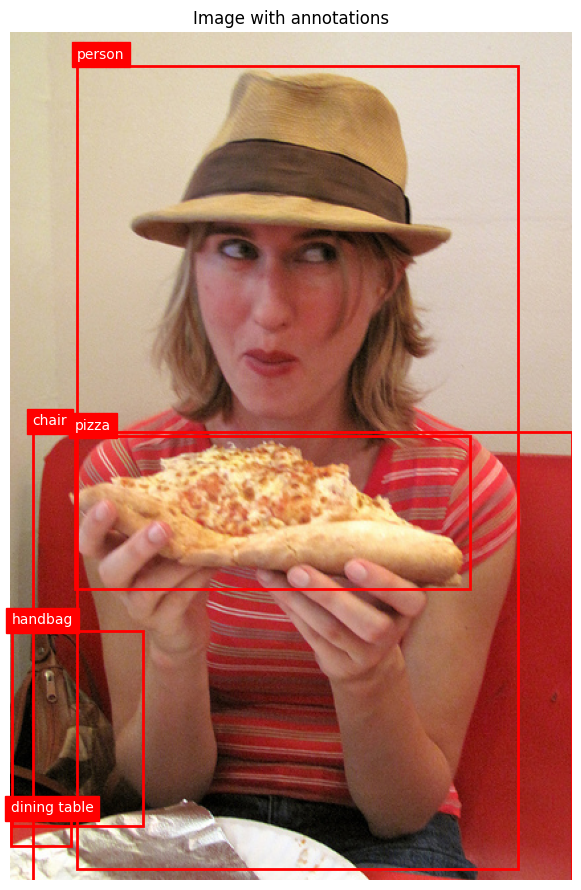

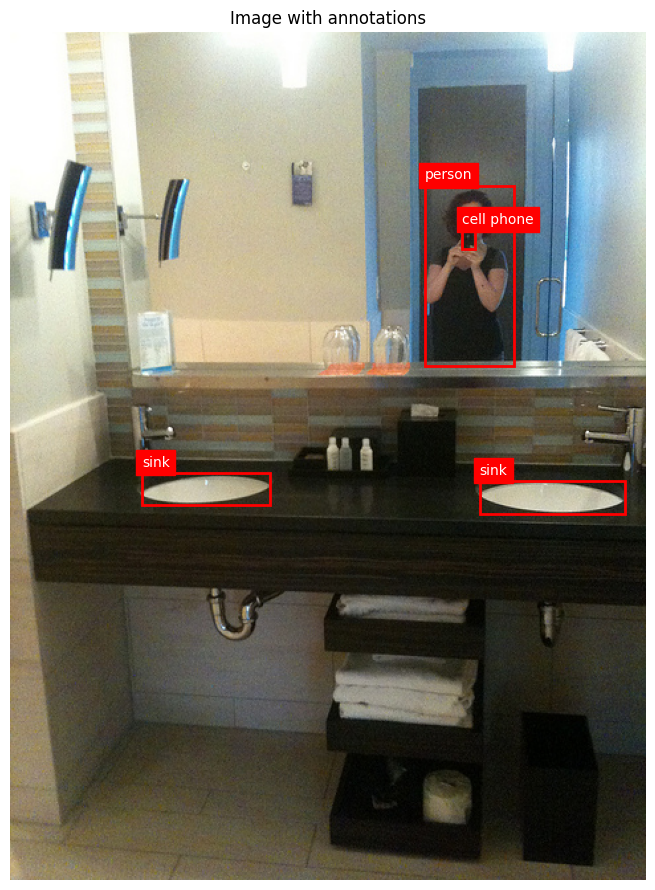

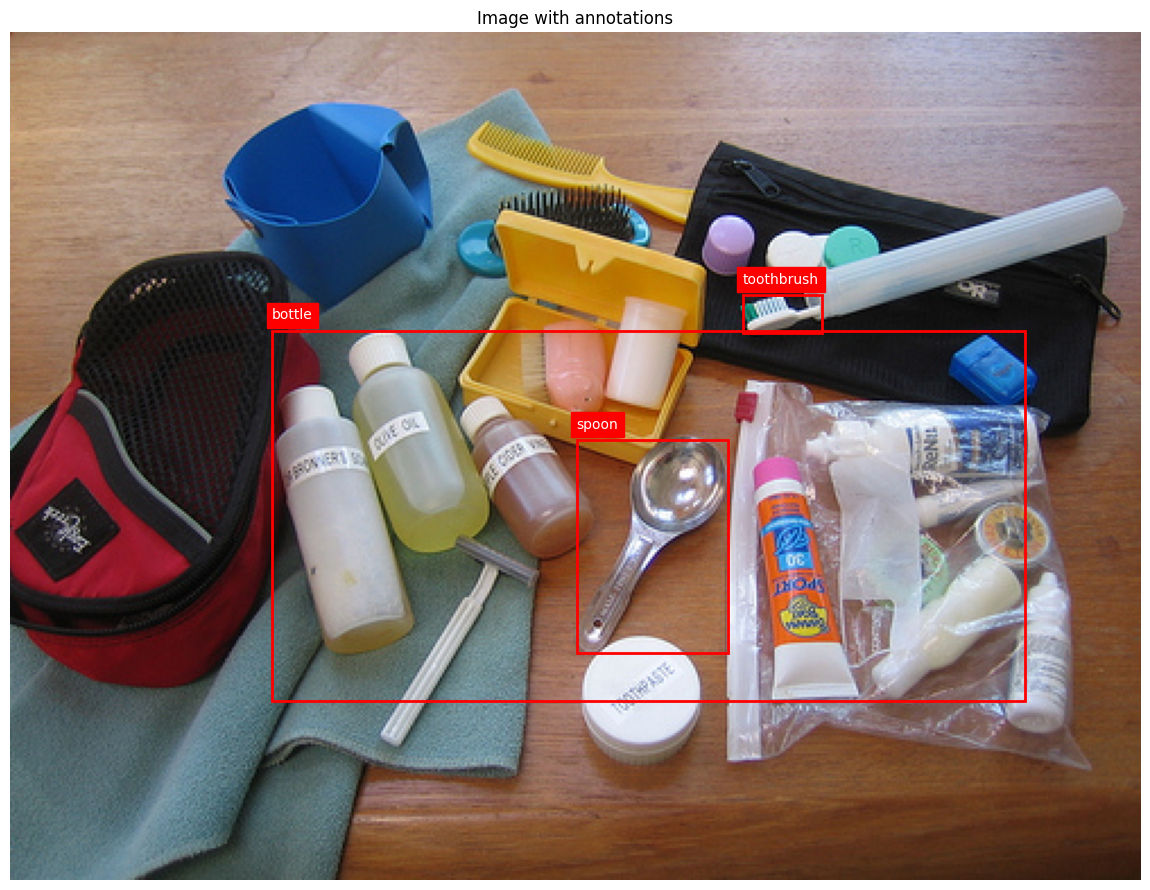

In [13]:
# Main execution
if __name__ == "__main__":
    print("COCO Dataset Explorer")

    # Get dataset statistics
    print("\nDataset Statistics:")
    stats = get_dataset_stats()

    # Get class distribution
    print("\nClass Distribution (Top 20 classes from training set):")
    class_dist = get_class_distribution(train_labels_dir)
    for i, (class_name, count) in enumerate(class_dist[:20]):
        print(f"{class_name}: {count}")

    # Visualize random samples
    print("\nVisualizing Random Samples:")
    visualize_random_samples(num_samples=3, split="train")